# (E7) 프로젝트 : 나랑 닮은 연예인을 찾아보자

연예인 사진과 나를 비교해 보는 시간을 갖도록 하겠습니다!

## import

In [3]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Step1. 사진 모으기

## 얼굴 부분 탐지

[(558, 468, 825, 200)]


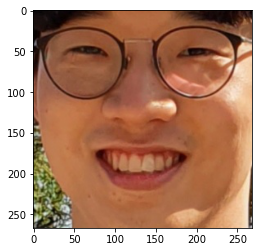

In [100]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images_for_project/홍세현_1.jpeg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

## 얼굴 영역 감지

In [5]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

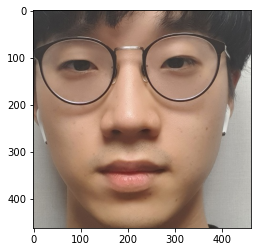

In [6]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images_for_project/홍세현_2.jpeg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

## 이미지 디렉토리 내의 이미지 파일 확인

In [7]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images_for_project'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['제이홉.jpeg', '로다주.jpeg', '방시혁.jpeg', '성시경.jpeg', 'obama.jpeg', '톰 홀랜드.jpg', '숀 코네리.jpg', '유희열.jpeg', '택연.jpeg', '서현진.jpeg', '리아.jpeg', '하정우.jpeg', '돈스파이크.jpeg', '안재홍.jpeg', '류승범.jpeg', '디오.jpeg', '유재석.jpeg', '박성호.jpeg', '차명석.jpeg', '찬열.jpeg', 'biden.jpeg', '조인성.jpeg', '공유.jpeg', '이민호.jpeg', '제프리 힌턴.jpg', '한석규.jpeg', '세훈.jpeg', 'clinton.jpeg', '드웨인 존슨.jpg', '박서준.jpeg', '트와이스다현.jpeg', '이안 굿펠로우.jpg', '미미.jpeg', '박명수.jpeg', '카이.jpeg', '정민철.jpeg', '정준하.jpeg', '이연걸.jpeg', '크리스 에반스.jpg', '크리스 햄스워스.jpg', '케이.jpeg', '지디.jpeg', '장원준.jpeg', '신동엽.jpeg', '잇지예지.jpeg', '차승원.jpeg', '문별.jpeg', '김영삼.jpeg', '씨잼.jpeg', '태양.jpeg', '서강준.jpeg', '잇지유나.jpeg', '조원희.jpeg', '박정민.jpeg', '유리.jpeg', '슈가.jpeg', '이종석.jpeg', '지코.jpeg', '민니.jpeg', '이승기.jpeg', '우기.jpeg', '장도연.jpeg', '고창석.jpeg', '케빈 스페이시.jpeg', '최양락.jpeg', '김학범.jpeg', '권현빈.jpeg', '조정석.jpeg', '박휘순.jpeg', '이천수.jpeg', '존 파브르.jpeg', '철면수심.jpeg', '이진호.jpeg', '박희순.jpeg', '이영하.jpeg', '윤종신.jpeg', '리사.jpeg', '지드래곤.jpeg', '레오나르도 디카프리오.jpeg', 'trump.jpeg'

## 얼굴 임베팅 벡터 구하기

In [8]:
image_file = os.path.join(dir_path, '홍세현_1.jpeg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.05857014,  0.09675033,  0.03335808, -0.05289053, -0.09434879,
        -0.05129612, -0.06168554, -0.1559322 ,  0.07819518, -0.10021085,
         0.24908632, -0.07638565, -0.23609436, -0.18432744, -0.03560434,
         0.19813988, -0.17635658, -0.13944277, -0.04053834,  0.01677003,
         0.10945246, -0.01206982,  0.03446721,  0.05291498, -0.10852601,
        -0.34850171, -0.1208884 , -0.0656221 , -0.01796676, -0.04484516,
        -0.08130495,  0.02933012, -0.13200116, -0.02352452,  0.02372336,
         0.07528026,  0.0189964 , -0.07695532,  0.1781622 , -0.04174774,
        -0.21108189,  0.01862451,  0.09239931,  0.2114822 ,  0.22875087,
         0.03908273,  0.06108534, -0.11063628,  0.13515049, -0.11891323,
         0.04265194,  0.09516905,  0.10059755,  0.02916504, -0.02142743,
        -0.16839796, -0.00229492,  0.16920625, -0.17414804, -0.03475304,
         0.07920404, -0.0973746 , -0.06311363, -0.07112808,  0.25932336,
         0.08723946, -0.17081496, -0.17495269,  0.1

## 얼굴 임베딩 벡터 딕셔너리화

In [12]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        
        if len(embedding) > 0: 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            
    return embedding_dict

In [13]:
embedding_dict = get_face_embedding_dict(dir_path)

## 얼굴 임베딩 사이의 거리 측정

In [14]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('홍세현_1','홍세현_2')

0.4254482707440669

In [15]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

## 나와 닮은 연예인 Top5

In [24]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+2):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if i == 1 :   # 두번째도 나이므로 제외합니다.
            continue
        
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i-1, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [25]:
get_nearest_face('홍세현_1')

순위 1 : 이름(정수빈), 거리(0.4313393271840945)
순위 2 : 이름(하현우), 거리(0.43522060344492347)
순위 3 : 이름(b1a4진영), 거리(0.46183849062155957)
순위 4 : 이름(개코), 거리(0.46453897463333893)
순위 5 : 이름(진), 거리(0.47009188308219946)


## 나와 닮은 연예인 Top5 사진 추출

In [133]:
def get_nearest(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+2):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if i == 1 :   # 두번째도 나이므로 제외합니다.
            continue
        
        if sorted_faces[i]:
            path = dir_path +'/' +sorted_faces[i][0] + '.jpeg'
            cropped_face = get_gropped_face(path)
            plt.subplot(1,6,i)
            plt.imshow(cropped_face)
            plt.axis('off')
       #    plt.title(title = 'Top : {} / name : {}'.format(i-1, sorted_faces[i][0])

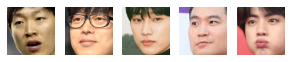

In [134]:
get_nearest('홍세현_1')

## 루브릭

1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.  

- 정수빈, 하현우, b1a4진영, 개코, 진이 나왔습니다.
- 사진을 출력하고 인물을 비교해보니 나머지는 다 맞게 나왔지만, 4순위 사진의 실제 인물은 최자입니다. 이미지 파일의 제목을 확인해보니 제목이 '개코.jpeg'로 잘못 설정되었습니다. 파일 제목을 '최자.jpeg'로 수정해야겠습니다.

2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.  

- 231개의 이미지를 사용하였고, 나와 닮은 연예인과 얼굴 임베딩 사이의 거리가 모두 0.5 이내로 나왔습니다.

3. 다양하고 재미있는 결과 시각화를 시도하였다.

- 임베딩 거리가 가까운 순대로 5명의 사진을 출력하였습니다. plot의 title을 달아보려고 시도를 하였는데 출력이 되지 않았고 아직 원인을 찾지 못했습니다.